In [84]:
#importing basic data handling and manipualtion libraries from python
import pandas as pd
import numpy as np

In [85]:
#reading csv file
df = pd.read_csv("../data/raw/youtube.csv")
df.tail()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
161465,161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/06/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,13/06/2018,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False
161469,161469,POTgw38-m58,18.14.06,ã€å®Œæ•´ç‰ˆã€‘é‡åˆ°ææ€–æƒ…äººè©²æ€Žéº¼è¾¦ï...,æˆ‘æ„›å°æ˜Žæ˜Ÿå¤§è·Ÿç­,24,13/06/2018,16:00 to 16:59,Wednesday,CANADA,"å³å®—æ†²|""å³å§å„’""|""å°æ˜Žæ˜Ÿå¤§è·Ÿç­""|""Sa...",107392,300,62,251,False,False,False


In [86]:

# getting basic info of the datasets like columns shapes and dtypes
columns = df.columns
print(f"There are {len(columns)} and thery are {columns}")

shapes= df.shape
print(f"The data set has {shapes[0]} rows")

datatypes = df.dtypes
print(f" Data are of followwing types as listed below {datatypes}")


There are 18 and thery are Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')
The data set has 161470 rows
 Data are of followwing types as listed below index                      int64
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_date              object
time_frame                object
published_day_of_week     object
publish_country           object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
vide

In [87]:
#checking for null values if present 
df.isna().sum()
df.duplicated().any()

np.False_

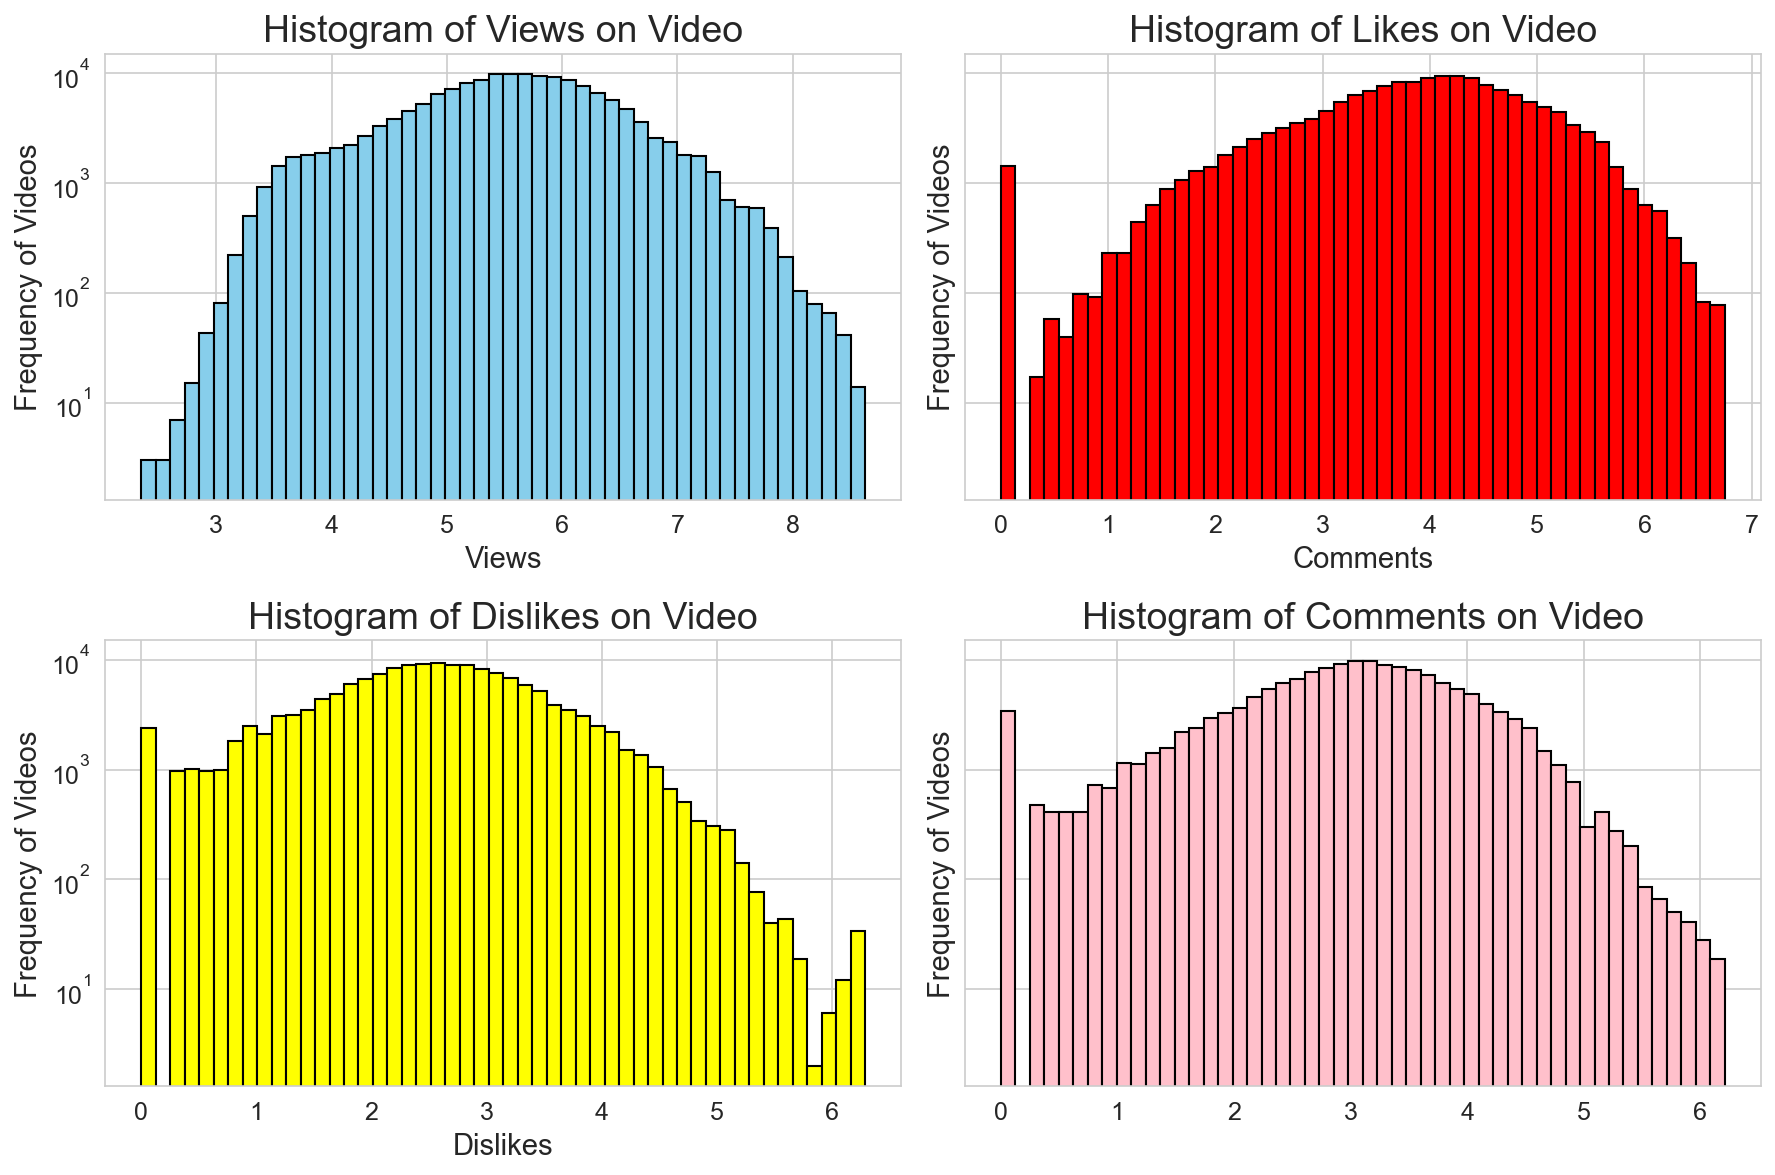

In [88]:
# Making Plots to understand data distribution 
# As all data are in millions so we plot data by converting it in to power of log 10
# This create evenly distribution as data scale can bw highly skewed 

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True) 
axes[0,0].set_title("Histogram of Views on Video")
axes[0,0].set_xlabel('Views')
axes[0,0].set_ylabel('Frequency of Videos')
axes[0,0].hist(np.log10(df['views']+1),bins=50, log=True, color='skyblue', edgecolor='black')

axes[0,1].set_title("Histogram of Likes on Video")
axes[0,1].set_xlabel('Likes')
axes[0,1].set_ylabel('Frequency of Videos')
axes[0,1].hist(np.log10(df['likes']+1),bins=50, log=True, color='red', edgecolor='black')

axes[1,0].set_title("Histogram of Dislikes on Video")
axes[1,0].set_xlabel('Dislikes')
axes[1,0].set_ylabel('Frequency of Videos')
axes[1,0].hist(np.log10(df['dislikes']+1),bins=50, log=True, color='yellow', edgecolor='black')


axes[1,1].set_title("Histogram of Comments on Video")
axes[0,1].set_xlabel('Comments')
axes[1,1].set_ylabel('Frequency of Videos')
axes[1,1].hist(np.log10(df['comment_count']+1),bins=50, log=True, color='pink', edgecolor='black')


plt.tight_layout()
plt.show()




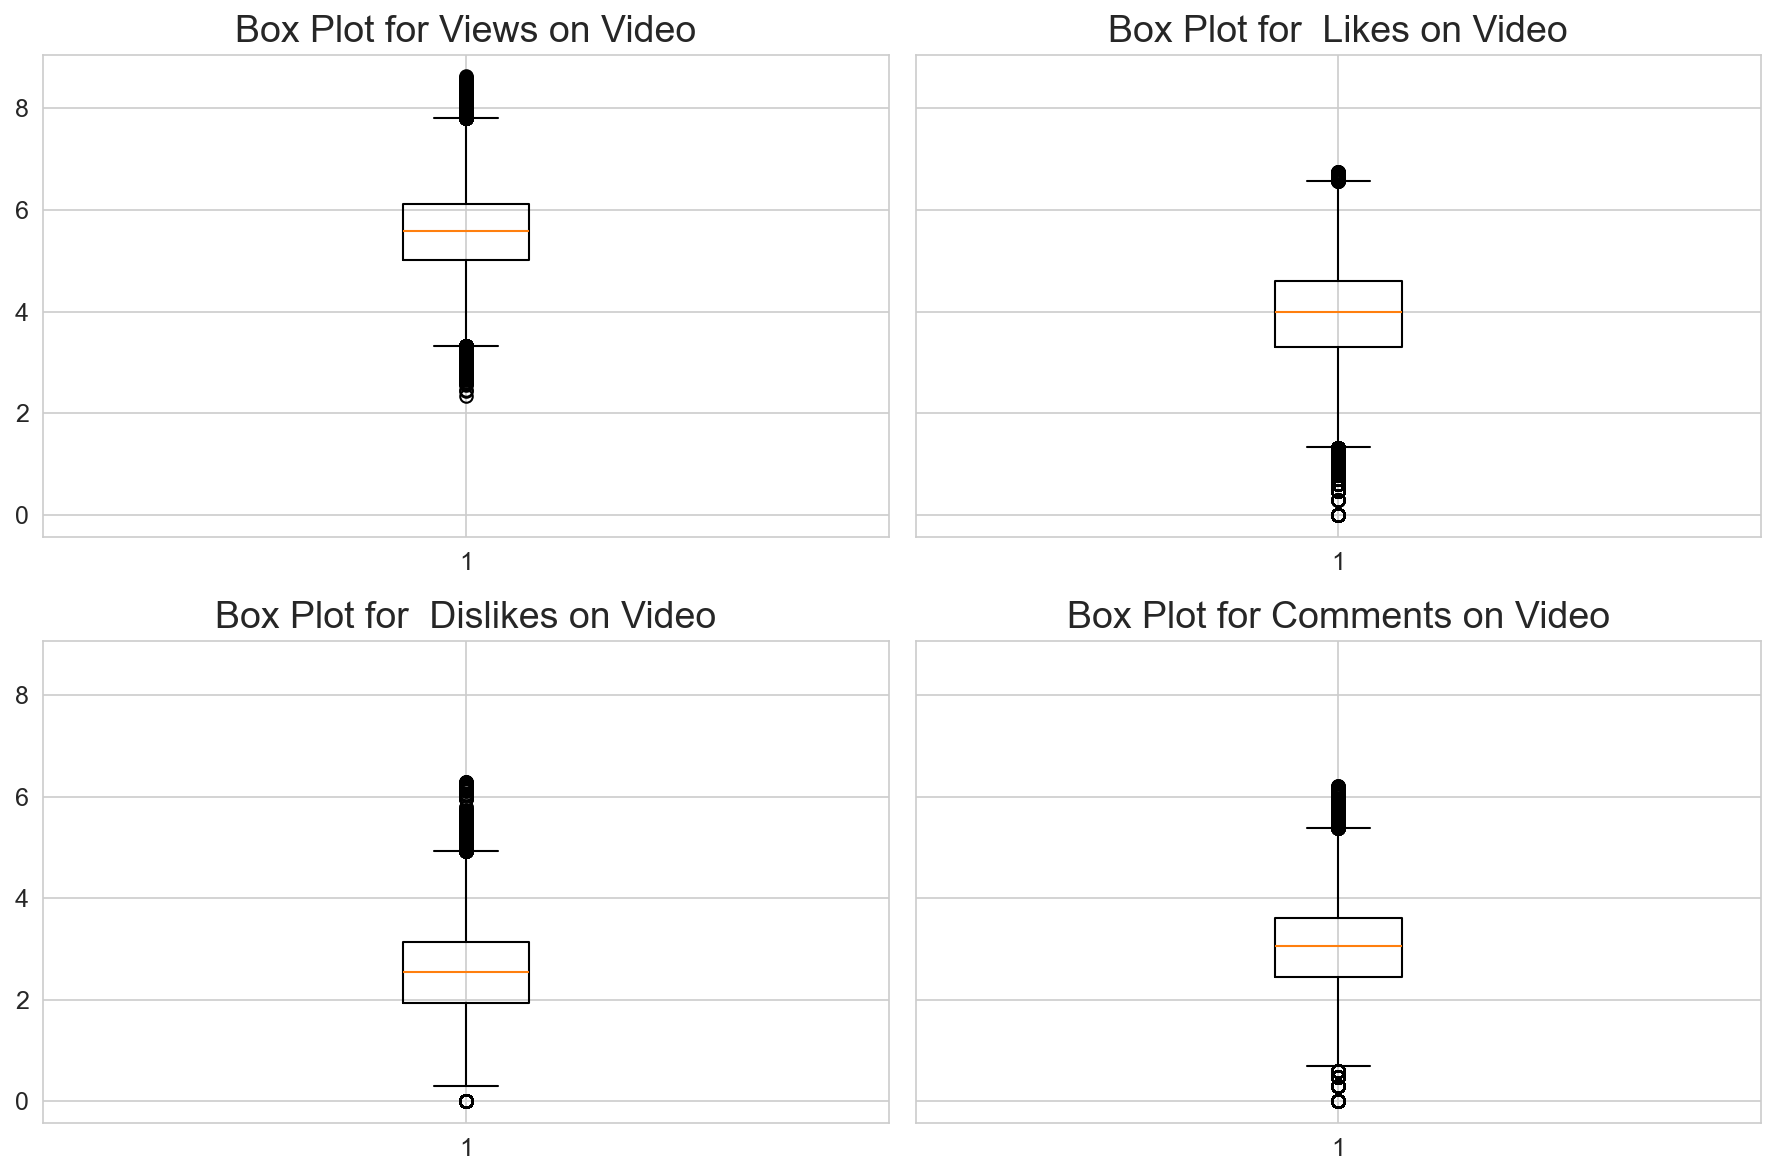

In [89]:
# Getting Box Plot to see the Skewness of the data

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True) 
axes[0,0].set_title("Box Plot for Views on Video")
axes[0,0].boxplot(np.log10(df['views'] + 1))

axes[0,1].set_title("Box Plot for  Likes on Video")
axes[0,1].boxplot(np.log10(df['likes'] + 1))

axes[1,0].set_title("Box Plot for  Dislikes on Video")
axes[1,0].boxplot(np.log10(df['dislikes'] + 1))


axes[1,1].set_title("Box Plot for Comments on Video")
axes[1,1].boxplot(np.log10(df['comment_count'] + 1))


plt.tight_layout()
plt.show()

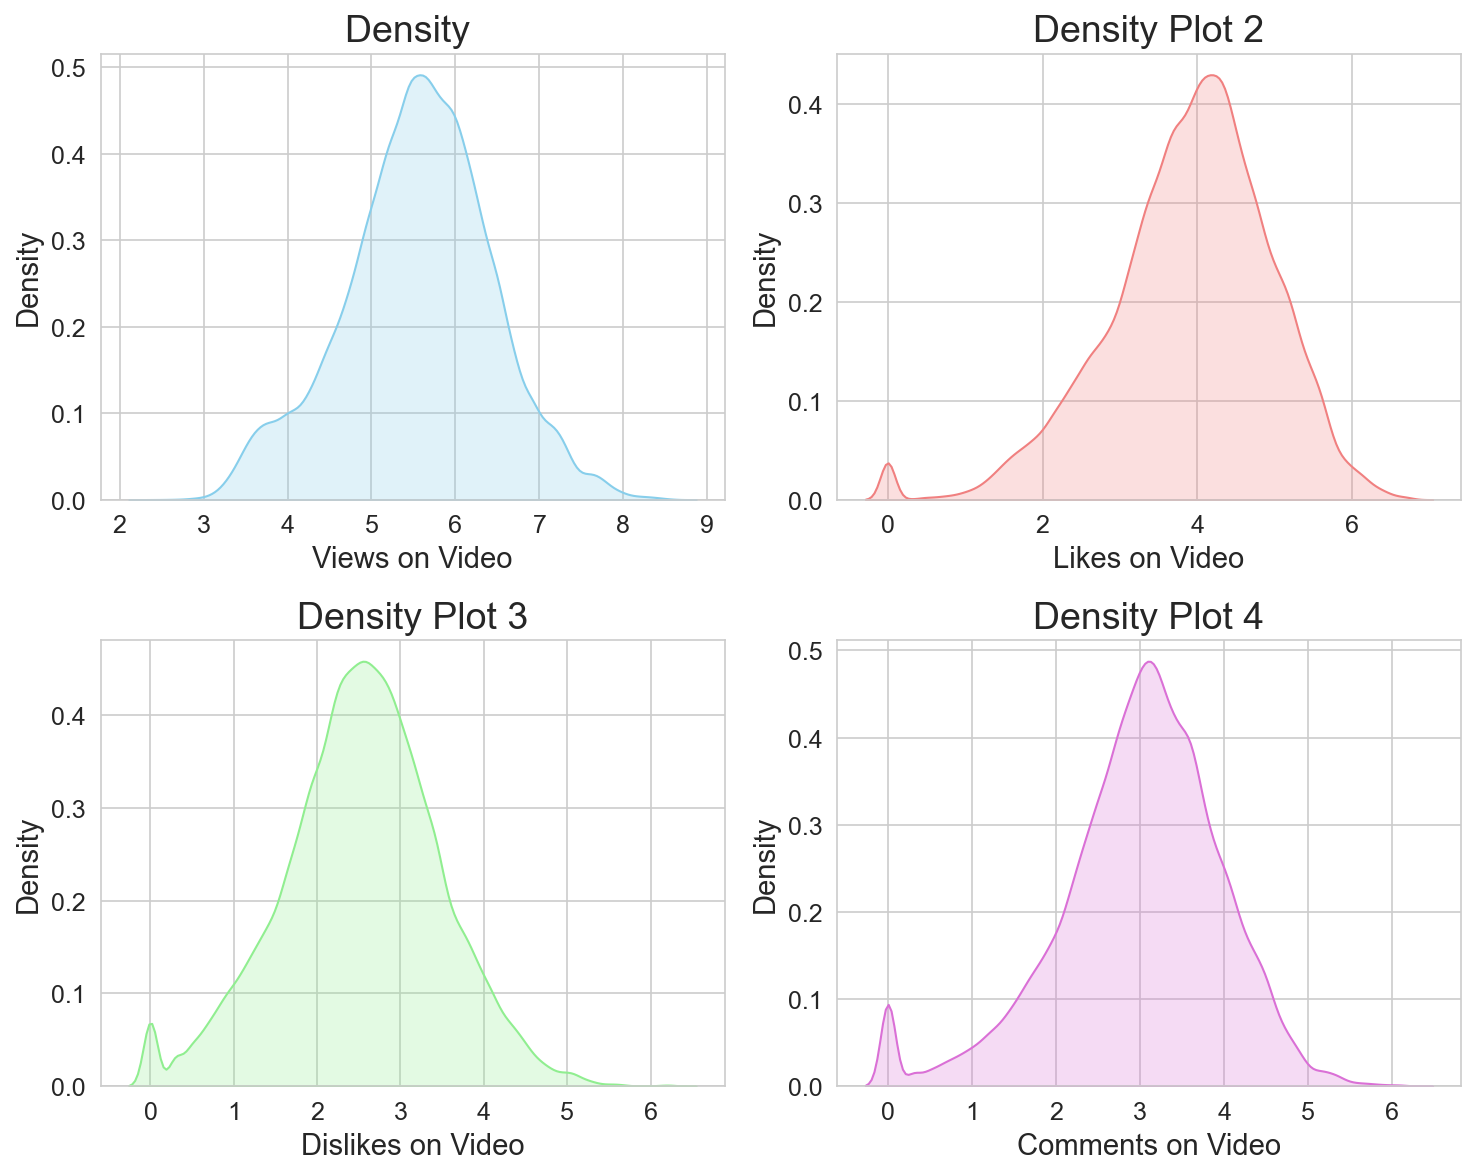

In [90]:
# Getting better view on distribution of data 
# Density Plot give continuous spread of frequency of datas 
# Thus givig better understanding where exactly the data are densed
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.kdeplot(np.log10(df['views']+1), ax=axs[0, 0], fill=True, color='skyblue')
axs[0, 0].set_title('Density ')
axs[0, 0].set_xlabel('Views on Video')
axs[0, 0].set_ylabel('Density')

sns.kdeplot(np.log10(df['likes']+1), ax=axs[0, 1], fill=True, color='lightcoral')
axs[0, 1].set_title('Density Plot 2')
axs[0, 1].set_xlabel('Likes on Video')
axs[0, 1].set_ylabel('Density')

sns.kdeplot(np.log10(df['dislikes']+1), ax=axs[1, 0], fill=True, color='lightgreen')
axs[1, 0].set_title('Density Plot 3')
axs[1, 0].set_xlabel('Dislikes on Video')
axs[1, 0].set_ylabel('Density')

sns.kdeplot(np.log10(df['comment_count']+1), ax=axs[1, 1], fill=True, color='orchid')
axs[1, 1].set_title('Density Plot 4')
axs[1, 1].set_xlabel('Comments on Video')
axs[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

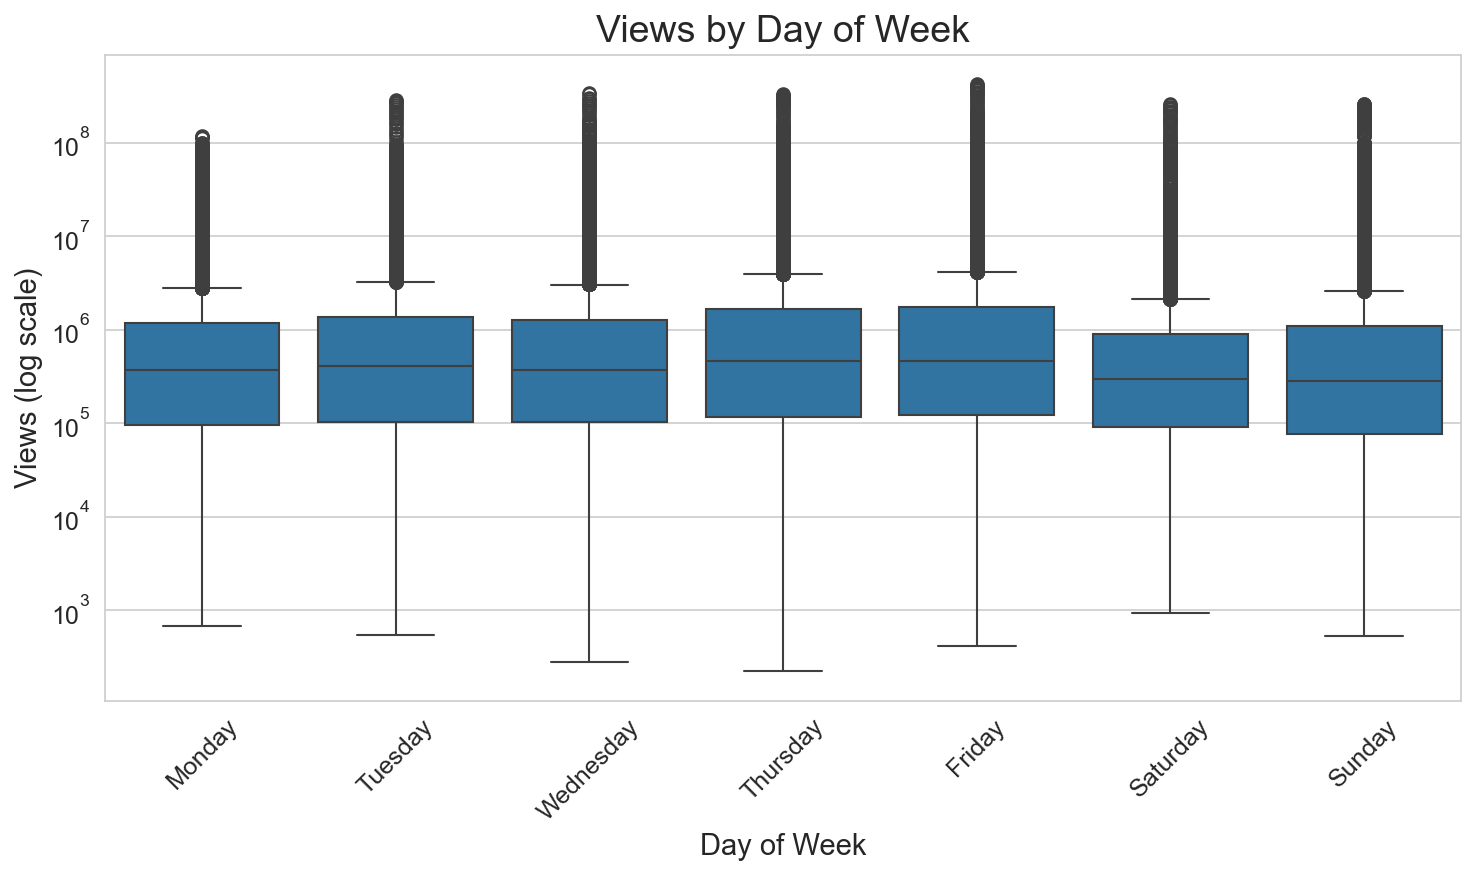

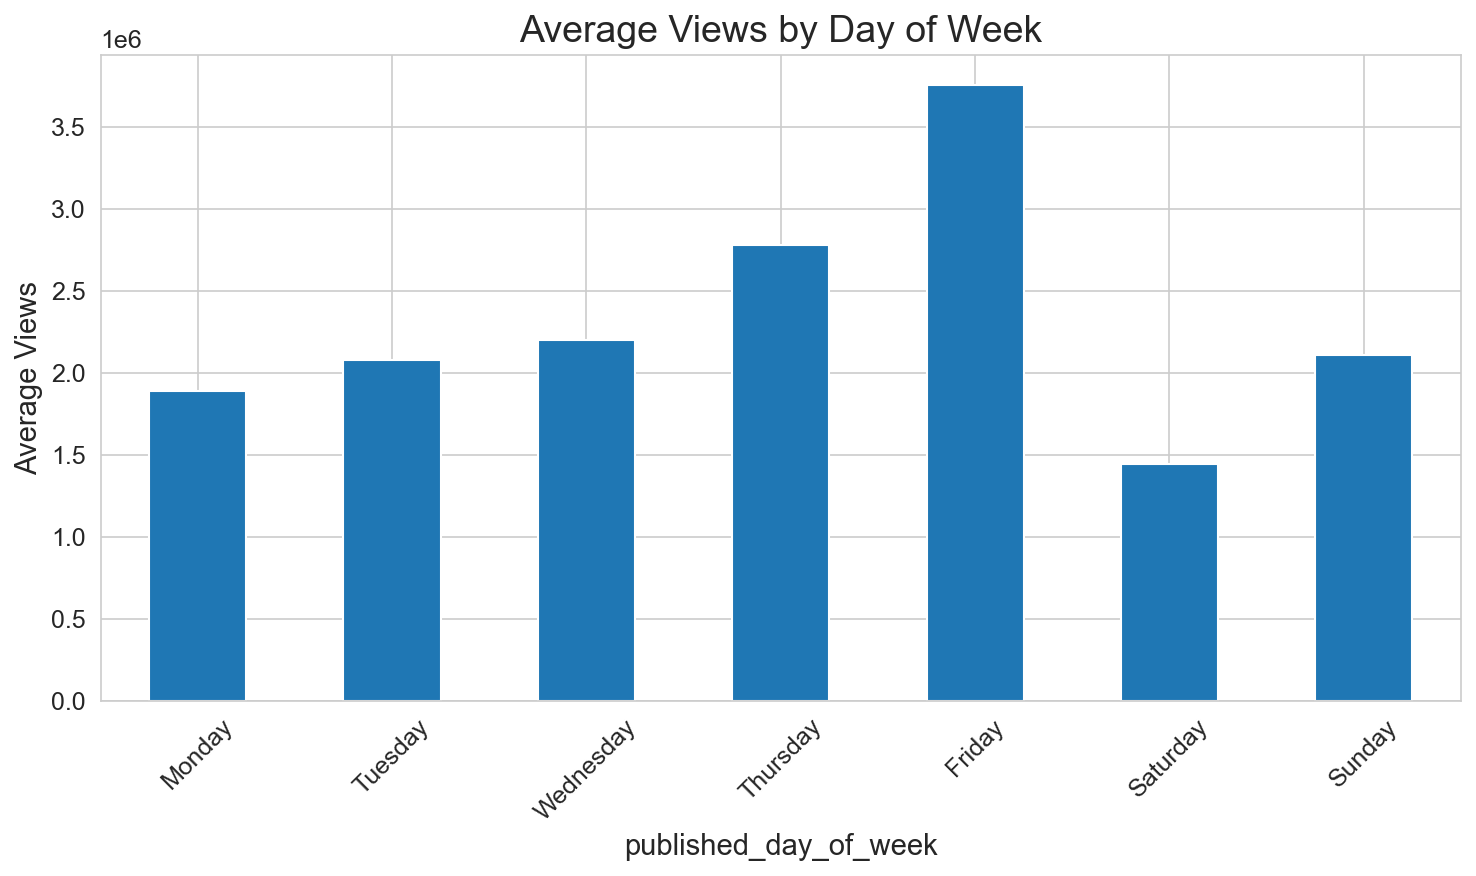

In [91]:
# Now we see data based on different days of week

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot views by day
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='published_day_of_week', y='views', order=day_order)
plt.yscale('log')  # Use log scale for views
plt.title('Views by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Views (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Or use bar plot for average views
df.groupby('published_day_of_week')['views'].mean().reindex(day_order).plot(kind='bar', figsize=(10,6))
plt.title('Average Views by Day of Week')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/2_/5q5ttccx4_92gx1kdsq3smjh0000gn/T/ipykernel_1147/1708512934.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['video_publish_data'] = pd.to_datetime(df['publish_date'])


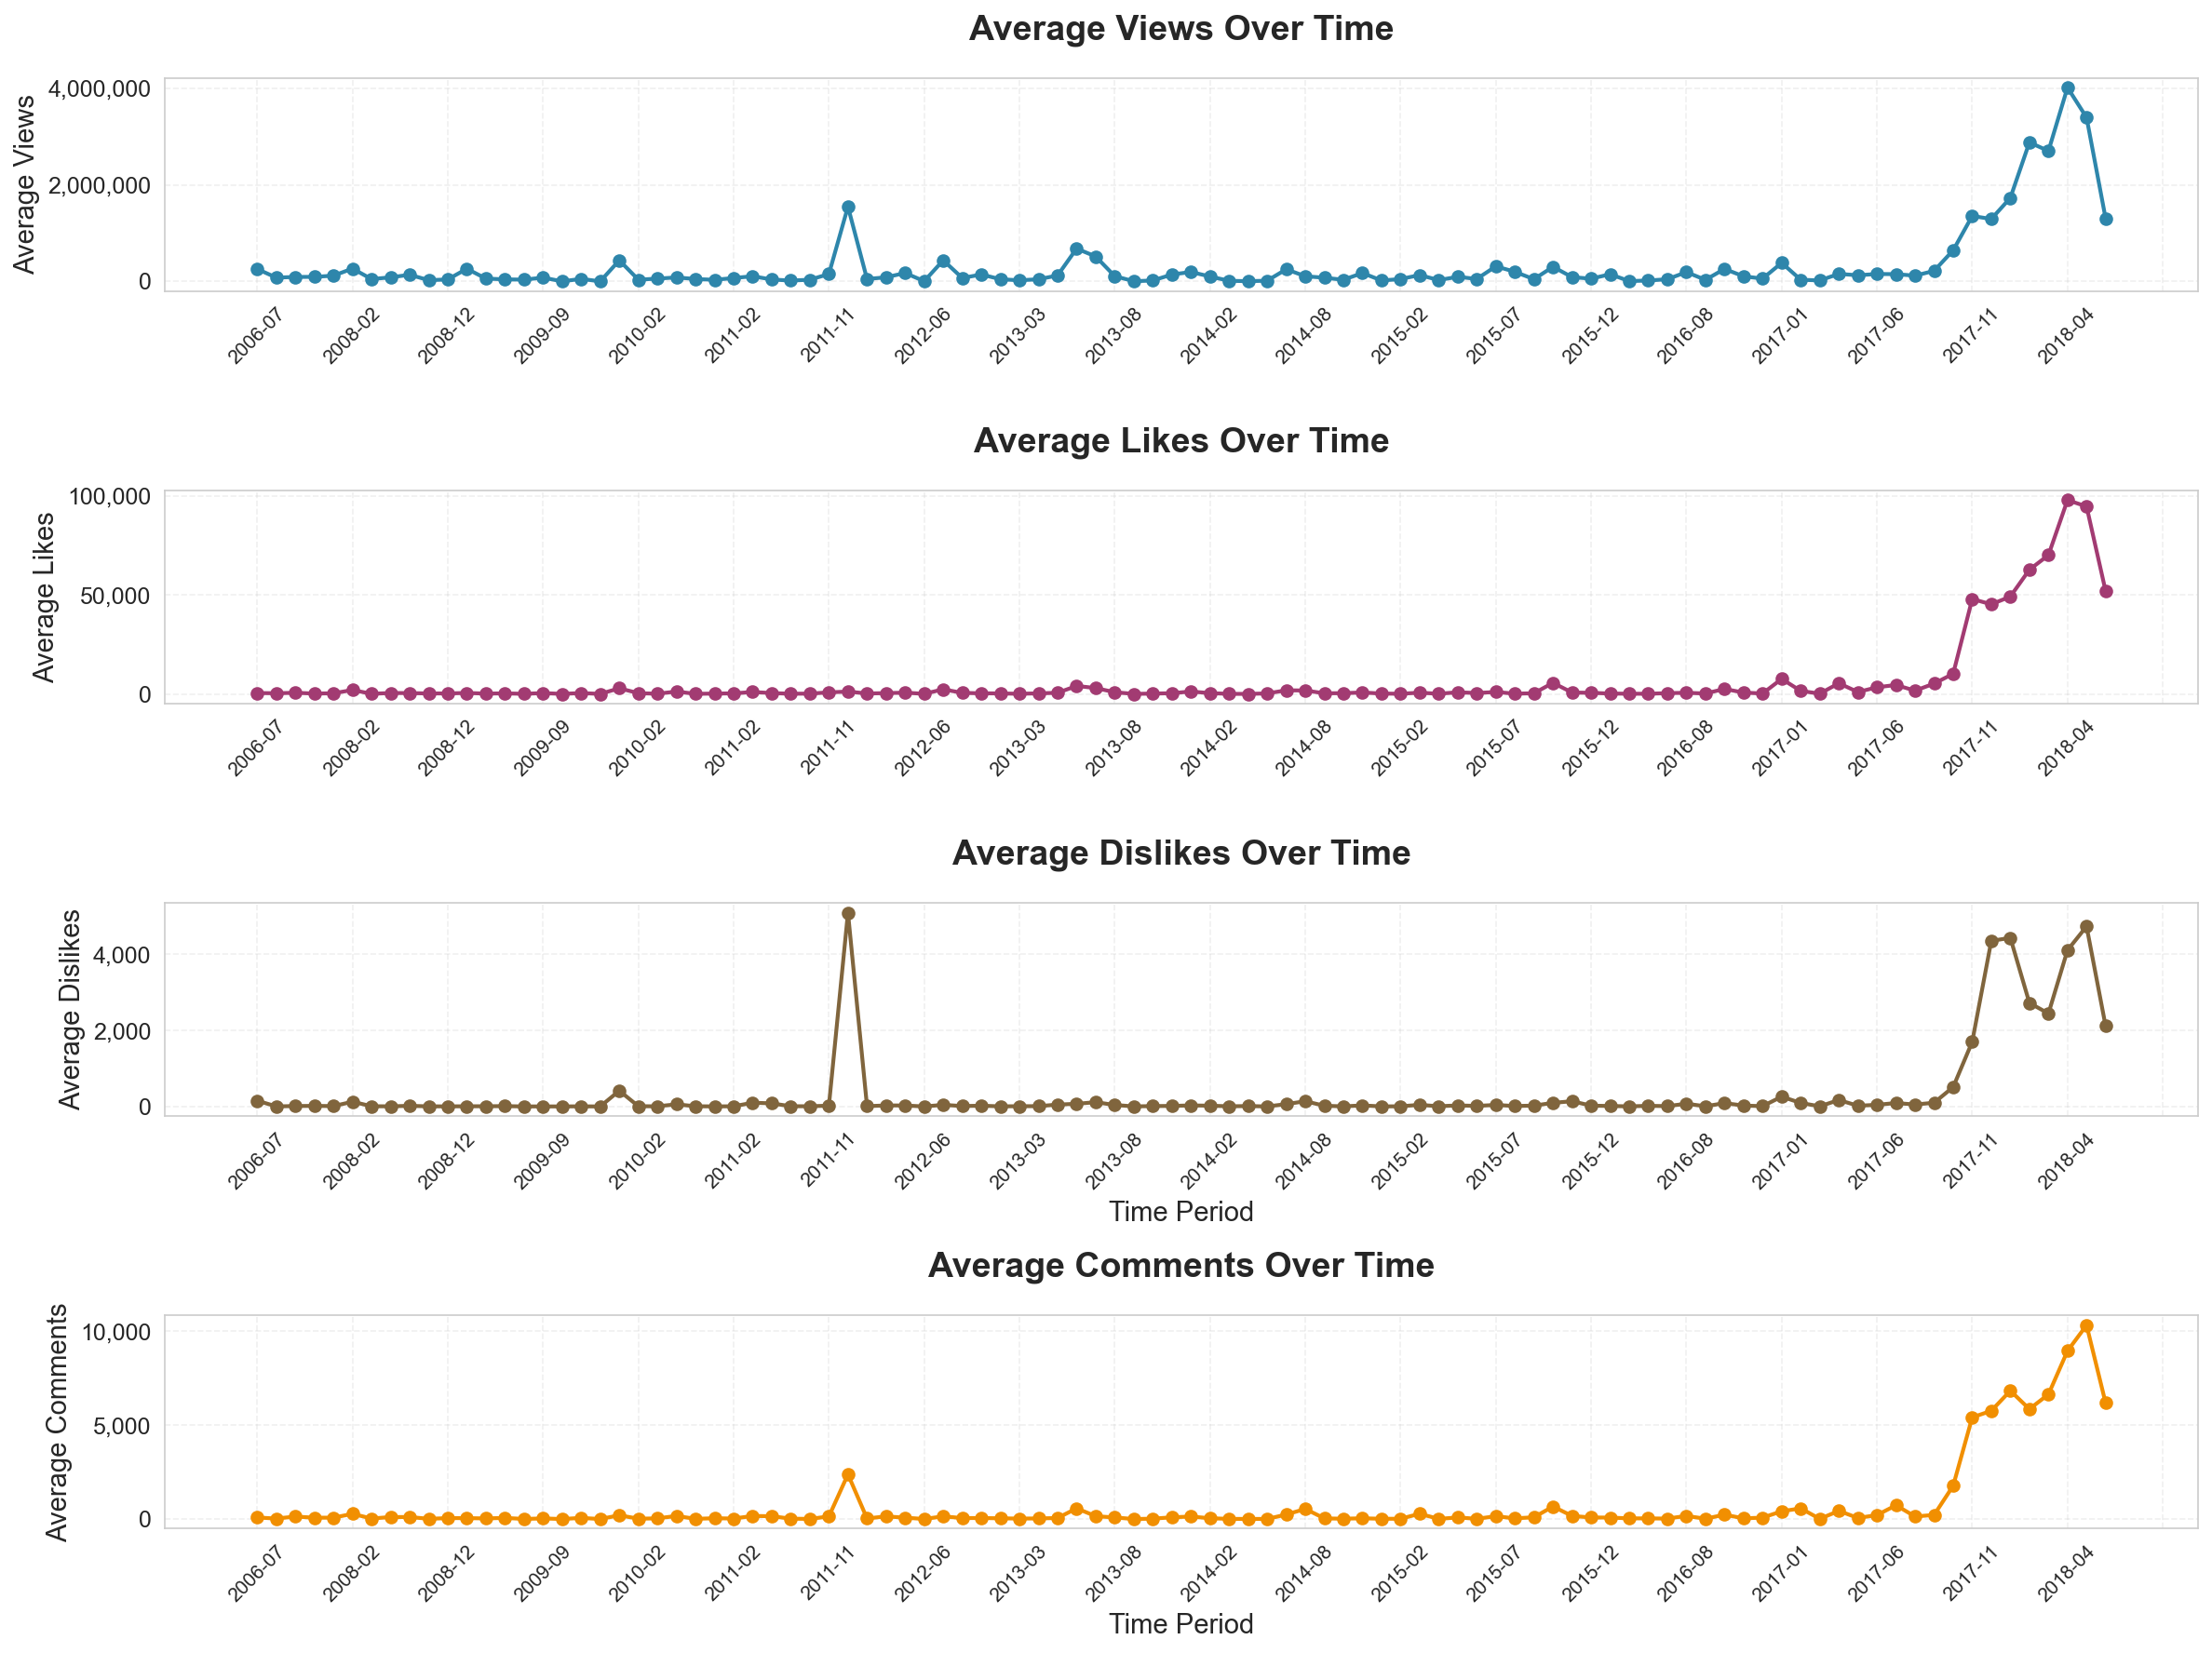

In [92]:
# Time Series Analysis 
# We doing monthly analysis on views count likes 

df['video_publish_data'] = pd.to_datetime(df['publish_date'])
df['year_month'] = df['video_publish_data'].dt.to_period('M')

# we See Monthly insights

monthly_stats = df.groupby('year_month').aggregate({
        'views': "mean",
        'likes': 'mean',
        'dislikes': 'mean',
        'comment_count': 'mean'
    }).reset_index()


monthly_stats['year_month'] = monthly_stats['year_month'].astype(str)


sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 150
})

# Create figure with larger size
fig, axes = plt.subplots(4, 1, figsize=(16, 12), dpi=150)

# Plot 1: Views
axes[0].plot(monthly_stats['year_month'], monthly_stats['views'], 
             marker='o', markersize=6, linewidth=2, color='#2E86AB')
axes[0].set_title('Average Views Over Time', fontsize=18, fontweight='bold', pad=20)
axes[0].set_ylabel('Average Views', fontsize=14)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=12)

# Format y-axis with commas
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Show fewer x-axis labels
axes[0].xaxis.set_major_locator(plt.MaxNLocator(25))

# Plot 2: Likes
axes[1].plot(monthly_stats['year_month'], monthly_stats['likes'], 
             marker='o', markersize=6, linewidth=2, color='#A23B72')
axes[1].set_title('Average Likes Over Time', fontsize=18, fontweight='bold', pad=20)
axes[1].set_ylabel('Average Likes', fontsize=14)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=12)

axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
axes[1].xaxis.set_major_locator(plt.MaxNLocator(25))

# Plot 3: dislikes
axes[2].plot(monthly_stats['year_month'], monthly_stats['dislikes'], 
             marker='o', markersize=6, linewidth=2, color="#80653D")
axes[2].set_title('Average Dislikes Over Time', fontsize=18, fontweight='bold', pad=20)
axes[2].set_ylabel('Average Dislikes', fontsize=14)
axes[2].set_xlabel('Time Period', fontsize=14)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].tick_params(axis='x', rotation=45, labelsize=10)
axes[2].tick_params(axis='y', labelsize=12)

axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
axes[2].xaxis.set_major_locator(plt.MaxNLocator(25))


# Plot 3: Comments
axes[3].plot(monthly_stats['year_month'], monthly_stats['comment_count'], 
             marker='o', markersize=6, linewidth=2, color='#F18F01')
axes[3].set_title('Average Comments Over Time', fontsize=18, fontweight='bold', pad=20)
axes[3].set_ylabel('Average Comments', fontsize=14)
axes[3].set_xlabel('Time Period', fontsize=14)
axes[3].grid(True, alpha=0.3, linestyle='--')
axes[3].tick_params(axis='x', rotation=45, labelsize=10)
axes[3].tick_params(axis='y', labelsize=12)

axes[3].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
axes[3].xaxis.set_major_locator(plt.MaxNLocator(25))
# Adjust spacing
plt.tight_layout()


plt.show()


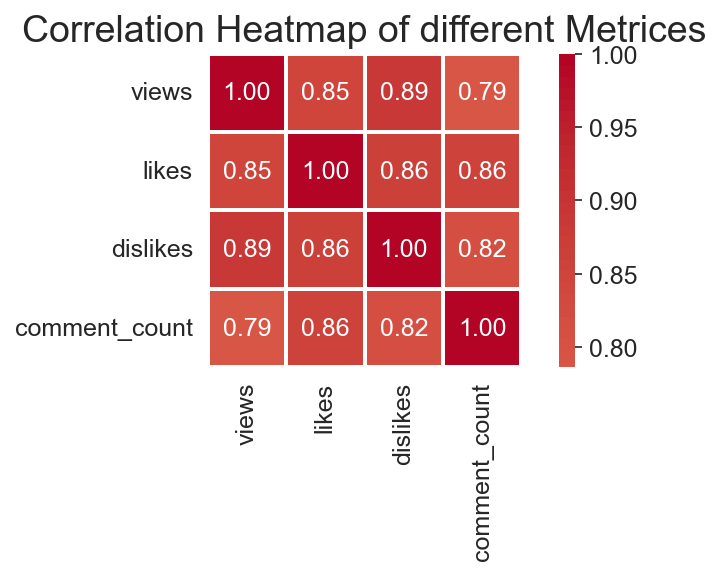

In [93]:
# Now we see the correlation between key metrices of the videos 

key_metrics = ['views', 'likes', 'dislikes', 'comment_count']
correlation_mat = np.log10(df[key_metrics]+1).corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_mat, annot=True,cmap='coolwarm', center=0, square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap of different Metrices')
plt.tight_layout()
plt.show()